In [1]:
from __future__ import division

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(0)
%matplotlib inline

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Please "pip install" the following module if you don't have it installed yet
# pip install sklearn
# pip install seaborn
# pip install pandas
# pip install statsmodels

Number of labels: 11
Heart Disease {'No', 'Yes'}
Age Group {'65 years and older', '18-39 years', '40-64 years', '50-64 years'}
Physical Activity {'No', 'Yes'}
Race/Ethnicity {'Non-Hispanic Black', 'Other', 'Non-Hispanic White', 'Hispanic'}
Smoking Status {'Current', 'Former', 'Never'}
Education Level {'High School and Below', 'More Than High School'}
Stroke {'No', 'Yes'}
Gender {'Male', 'Female'}
Diabetes {'No', 'Yes'}
Fair or Poor General Health {'No', 'Yes'}
Hypertension {'No', 'Yes'}


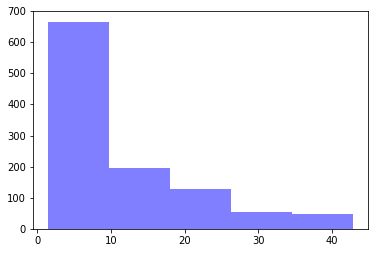

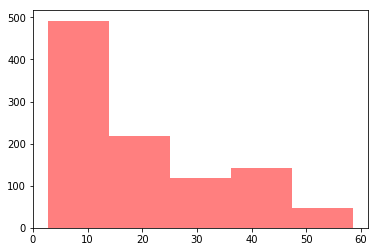

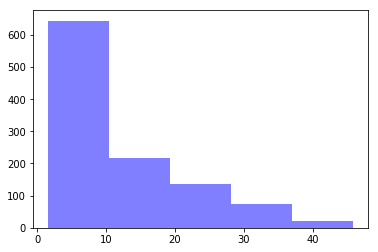

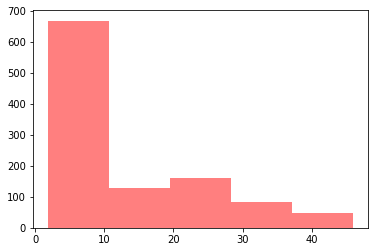

In [3]:
### Please change the following two file paths to where the DataSet.csv is located at
### new_file_path is where the new csv file (after one-hot preprocessing) will be generated. Please also consider changing it

mac_file_path = "./DataSet.csv"
new_file_path = "./processedData.csv"

included_cols = [3,9,14,15,16]
labels = dict()
data = dict()

X = []
Y = []

with open(mac_file_path, "r") as f:
    reader = csv.reader(f)
    i = next(reader)
    
    for row in reader:
        content = list(row[num] for num in included_cols)
        if content[3] != "Total":
            if content[0][0] == "E" or content[0][0] == "B" or content[0][0] == "V":
                if content[4] not in labels:
                    labels[content[4]] = set()
                labels[content[4]].add(content[3])

print("Number of labels:", len(labels))

for item in labels:
    print(item, labels[item])
    
counter = 0
for item in labels:
    for value in labels[item]:
        data[tuple([item, value])] = counter
        counter += 1
        
with open(mac_file_path, "r") as f:
    reader = csv.reader(f)
    i = next(reader)
    
    for row in reader:
        content = list(row[num] for num in included_cols)
        if content[3] != "Total":
            if content[0][0] == "E" or content[0][0] == "B" or content[0][0] == "V":
                if content[1] != "":
                    X.append(float(data[tuple([content[4], content[3]])]))
                    Y.append(float(content[1]))

counter = 0
a = []
b = []
c = []
d = []
for value in X:
    if(int(value) == 0):
        a.append(Y[counter])
    if(int(value)==1):
        b.append(Y[counter])
    if(int(value)==19):
        c.append(Y[counter])
    if(int(value)==20):
        d.append(Y[counter])  
    counter += 1


num_bins = 5
n, bins, patches = plt.hist(a, num_bins, facecolor='blue', alpha=0.5)
plt.show()

num_bins = 5
n, bins, patches = plt.hist(b, num_bins, facecolor='red', alpha=0.5)
plt.show()

num_bins = 5
n, bins, patches = plt.hist(c, num_bins, facecolor='blue', alpha=0.5)
plt.show()

num_bins = 5
n, bins, patches = plt.hist(d, num_bins, facecolor='red', alpha=0.5)
plt.show()

In [4]:
t = pd.read_csv(mac_file_path)
t.head()

,Year,LocationAbbr,LocationDesc,Topic,Question,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,...,Sample_Size,Break_Out,Break_Out_Category,GeoLocation,TopicId,QuestionId,LocationId,BreakOutId,BreakOutCategoryId,ResponseId
0,2016,NH,New Hampshire,Blindness or Severe Difficulty Seeing,Percentage of Adults 18 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,9.2,...,555.0,Yes,Heart Disease,"(43.655950113, -71.50036092)",T04,Q50_2013,33,Hrt1,BOC10,NaN
1,2016,WI,Wisconsin,Blindness or Severe Difficulty Seeing,Percentage of Adults 18 Years and Older Who Re...,BRFSS,NaN,%,Age-Adjusted Prevalence,2.7,...,4566.0,No,Heart Disease,"(44.393191174, -89.816370742)",T04,Q50_2013,55,Hrt2,BOC10,NaN
2,2016,VT,Vermont,Blindness or Severe Difficulty Seeing,Percentage of Adults 18 Years and Older Who Re...,BRFSS,NaN,%,Age-Adjusted Prevalence,NaN,...,NaN,18-39 years,Age Group,"(43.625381239, -72.517640791)",T04,Q50_2013,50,Age1839,BOC1,NaN
3,2016,KY,Kentucky,Blindness or Severe Difficulty Seeing,Percentage of Adults 18 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,11.1,...,3060.0,No,Physical Activity,"(37.645970271, -84.774971048)",T04,Q50_2013,21,Act2,BOC6,NaN
4,2016,OH,Ohio,Blindness or Severe Difficulty Seeing,Percentage of Adults 18 Years and Older Who Re...,BRFSS,NaN,%,Crude Prevalence,NaN,...,NaN,Other,Race/Ethnicity,"(40.060210141, -82.404260056)",T04,Q50_2013,39,Eth4,BOC3,NaN


# Play with the dataset

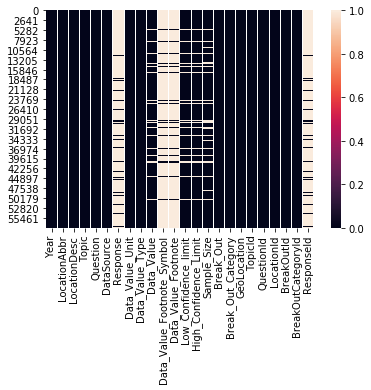

In [5]:
sns.heatmap(t.isnull())

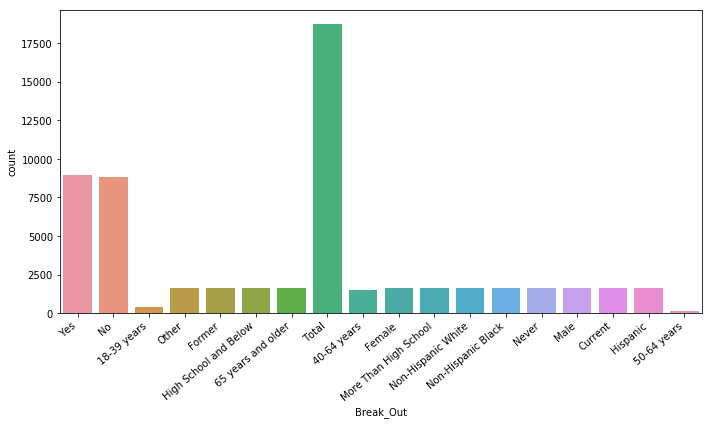

In [6]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Break_Out', data=t)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

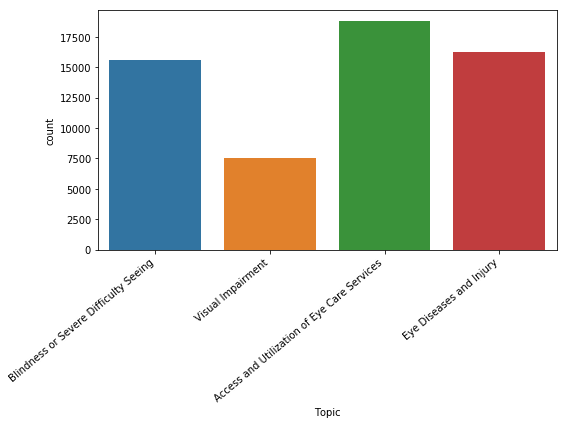

In [7]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Topic', data=t)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# One-Hot Data Pre-processing

In [8]:
from collections import defaultdict

# Recreate the csv file using One-Hot data pre-processing

topics = ["Blindness or Severe Difficulty Seeing", "Visual Impairment", "Access and Utilization of Eye Care Services", "Eye Diseases and Injury"]

def one_hot_preprocess(topic):
    with open(new_file_path, 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(['Percentage', 'Heart_Disease_Yes', 'Heart_Disease_No', 'Age_Group_18-39', 'Age_Group_40-64', 'Age_Group_65-', 'Physical_Activity_Yes', 'Physical_Activity_No', 'Race_Hispanic', 'Race_White', 'Race_Black', 'Race_Other', 'Current_Smoking', 'Former_Smoking', 'Never_Smoking', 'More_Than_High_School', 'High_School_And_Less', 'Stroke_Yes', 'Stroke_No', 'Male', 'Female', 'Diabetes_Yes', 'Diabetes_No', 'Poor_Health_Yes', 'Poor_Health_No', 'Hypertension_Yes', 'Hypertension_No'])

        with open(mac_file_path, "r") as f:
            reader = csv.reader(f)
            i = next(reader)
            for row in reader:
                content = list(row[num] for num in [3, 9, 15, 16])
                if content[0] == topic:
                    processed_data = defaultdict(lambda: 0) #Initialize a defaultdict to give every feature variable a default value 0
                    processed_data['Percentage'] = content[1]
                
                    if content[3] == 'Heart Disease':
                        if content[2] == 'Total':
                            processed_data['Heart_Disease_Yes'] = 1
                            processed_data['Heart_Disease_No'] = 1
                        else:
                            processed_data['Heart_Disease_'+ content[2]] = 1
                
                    if content[3] == 'Age Group':
                        if content[2] == 'Total':
                            processed_data['Age_Group_18-39'] = 1
                            processed_data['Age_Group_40-64'] = 1
                            processed_data['Age_Group_65-'] = 1
                        elif content[2] == '18-39 years':
                            processed_data['Age_Group_18-39'] = 1
                        elif content[2] == '40-64 years':
                            processed_data['Age_Group_40-64'] = 1
                        else:
                            processed_data['Age_Group_65-'] = 1
            
                    if content[3] == 'Physical Activity':
                        if content[2] == 'Total':
                            processed_data['Physical_Activity_Yes'] = 1
                            processed_data['Physical_Activity_No'] = 1
                        else:
                            processed_data['Physical_Activity_'+ content[2]] = 1
                        
                    if content[3] == 'Race/Ethnicity':
                        if content[2] == 'Total':
                            processed_data['Race_Hispanic'] = 1
                            processed_data['Race_White'] = 1
                            processed_data['Race_Black'] = 1
                            processed_data['Race_Other'] = 1
                        elif content[2] == 'Hispanic':
                            processed_data['Race_Hispanic'] = 1
                        elif content[2] == 'Non-Hispanic White':
                            processed_data['Race_White'] = 1
                        elif content[2] == 'Non-Hispanic Black':
                            processed_data['Race_Black'] = 1
                        elif content[2] == 'Other':
                            processed_data['Race_Other'] = 1
                
                    if content[3] == 'Smoking Status':
                        if content[2] == 'Total':
                            processed_data['Current_Smoking'] = 1
                            processed_data['Former_Smoking'] = 1
                            processed_data['Never_Smoking'] = 1
                        else:
                            processed_data[content[2] + '_Smoking'] = 1

                    if content[3] == 'Education Level':
                        if content[2] == 'Total':
                            processed_data['More_Than_High_School'] = 1
                            processed_data['High_School_And_Less'] = 1
                        elif content[2] == 'More Than High School':
                            processed_data['More_Than_High_School'] = 1
                        else:
                            processed_data['High_School_And_Less'] = 1
                
                    if content[3] == 'Stroke':
                        if content[2] == 'Total':
                            processed_data['Stroke_Yes'] = 1
                            processed_data['Stroke_No'] = 1
                        else:
                            processed_data['Stroke_' + content[2]] = 1
                
                    if content[3] == 'Gender':
                        if content[2] == 'Total':
                            processed_data['Male'] = 1
                            processed_data['Female'] = 1
                        elif content[2] == 'Male':
                            processed_data['Male'] = 1
                        else:
                            processed_data['Female'] = 1
                
                    if content[3] == 'Diabetes':
                        if content[2] == 'Total':
                            processed_data['Diabetes_Yes'] = 1
                            processed_data['Diabetes_No'] = 1
                        else:
                            processed_data['Diabetes_' + content[2]] = 1
                
                    if content[3] == 'Fair or Poor General Health':
                        if content[2] == 'Total':
                            processed_data['Poor_Health_Yes'] = 1
                            processed_data['Poor_Health_No'] = 1
                        else:
                            processed_data['Poor_Health_' + content[2]] = 1
                
                    if content[3] == 'Hypertension':
                        if content[2] == 'Total':
                            processed_data['Hypertension_Yes'] = 1
                            processed_data['Hypertension_No'] = 1
                        else:
                            processed_data['Hypertension_' + content[2]] = 1
                else:
                    continue
                filewriter.writerow([processed_data['Percentage'], processed_data['Heart_Disease_Yes'], processed_data['Heart_Disease_No'], processed_data['Age_Group_18-39'], processed_data['Age_Group_40-64'], processed_data['Age_Group_65-'], processed_data['Physical_Activity_Yes'], processed_data['Physical_Activity_No'], processed_data['Race_Hispanic'], processed_data['Race_White'], processed_data['Race_Black'], processed_data['Race_Other'], processed_data['Current_Smoking'], processed_data['Former_Smoking'], processed_data['Never_Smoking'], processed_data['More_Than_High_School'], processed_data['High_School_And_Less'], processed_data['Stroke_Yes'], processed_data['Stroke_No'], processed_data['Male'], processed_data['Female'], processed_data['Diabetes_Yes'], processed_data['Diabetes_No'], processed_data['Poor_Health_Yes'], processed_data['Poor_Health_No'], processed_data['Hypertension_Yes'], processed_data['Hypertension_No']])


In [9]:
# d1, d2, d3, and d4 corresponding to "Blindness or Severe Difficulty Seeing", "Visual Impairment", "Access and Utilization of Eye Care Services", and "Eye Diseases and Injury"
one_hot_preprocess(topics[0])
d1 = pd.read_csv(new_file_path)

one_hot_preprocess(topics[1])
d2 = pd.read_csv(new_file_path)

one_hot_preprocess(topics[2])
d3 = pd.read_csv(new_file_path)

one_hot_preprocess(topics[3])
d4 = pd.read_csv(new_file_path)

d1.head() # showing the first 5 rows of dataframe - Blindness or Severe Difficulty Seeing

,Percentage,Heart_Disease_Yes,Heart_Disease_No,Age_Group_18-39,Age_Group_40-64,Age_Group_65-,Physical_Activity_Yes,Physical_Activity_No,Race_Hispanic,Race_White,...,Stroke_Yes,Stroke_No,Male,Female,Diabetes_Yes,Diabetes_No,Poor_Health_Yes,Poor_Health_No,Hypertension_Yes,Hypertension_No
0,9.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Check for missing data

In [10]:
d1.isnull().head()

,Percentage,Heart_Disease_Yes,Heart_Disease_No,Age_Group_18-39,Age_Group_40-64,Age_Group_65-,Physical_Activity_Yes,Physical_Activity_No,Race_Hispanic,Race_White,...,Stroke_Yes,Stroke_No,Male,Female,Diabetes_Yes,Diabetes_No,Poor_Health_Yes,Poor_Health_No,Hypertension_Yes,Hypertension_No
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


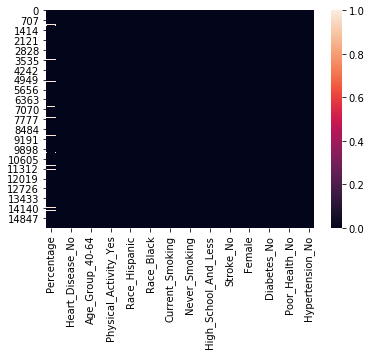

In [11]:
sns.heatmap(d1.isnull())

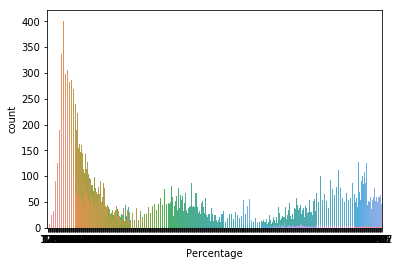

In [12]:
sns.countplot(x='Percentage', data=d1)
sns.countplot(x='Percentage', data=d2)
sns.countplot(x='Percentage', data=d3)
sns.countplot(x='Percentage', data=d4)

# Data Cleaning

In [13]:
d1 = d1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
d2 = d2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
d3 = d3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
d4 = d4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
d1.head() # showing the first 5 rows of dataframe-"Blindness or Severe Difficulty Seeing" after getting rid of empty cells

,Percentage,Heart_Disease_Yes,Heart_Disease_No,Age_Group_18-39,Age_Group_40-64,Age_Group_65-,Physical_Activity_Yes,Physical_Activity_No,Race_Hispanic,Race_White,...,Stroke_Yes,Stroke_No,Male,Female,Diabetes_Yes,Diabetes_No,Poor_Health_Yes,Poor_Health_No,Hypertension_Yes,Hypertension_No
0,9.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data and Train the model using Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Distribution of Each Topic:



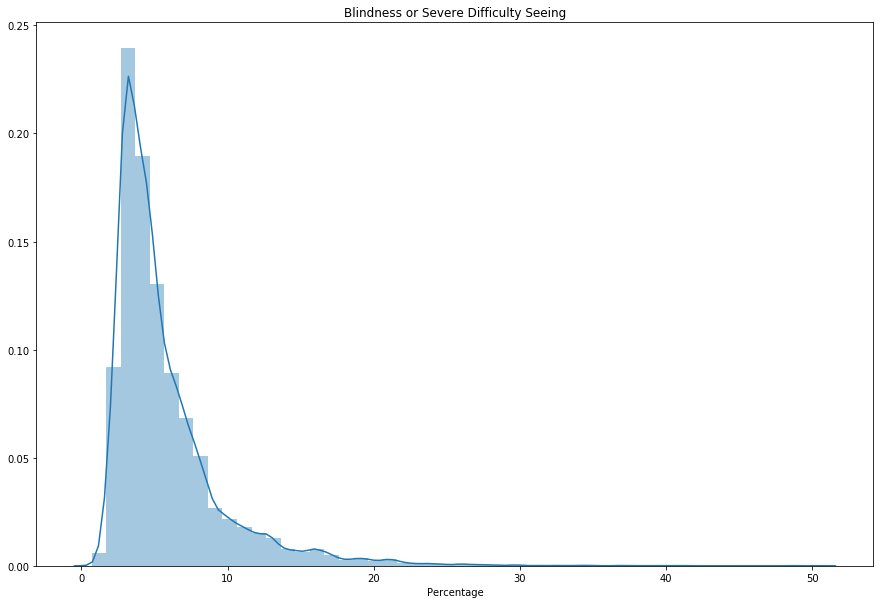

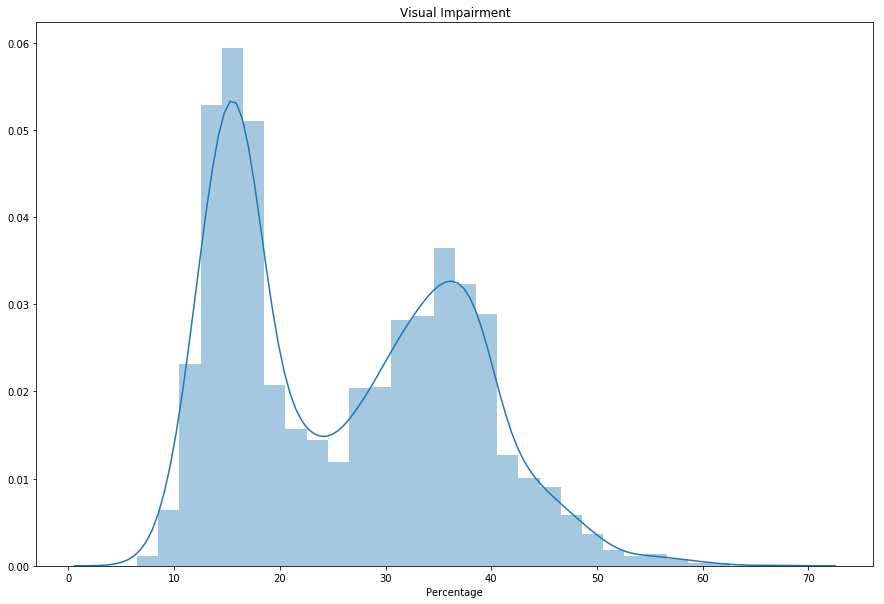

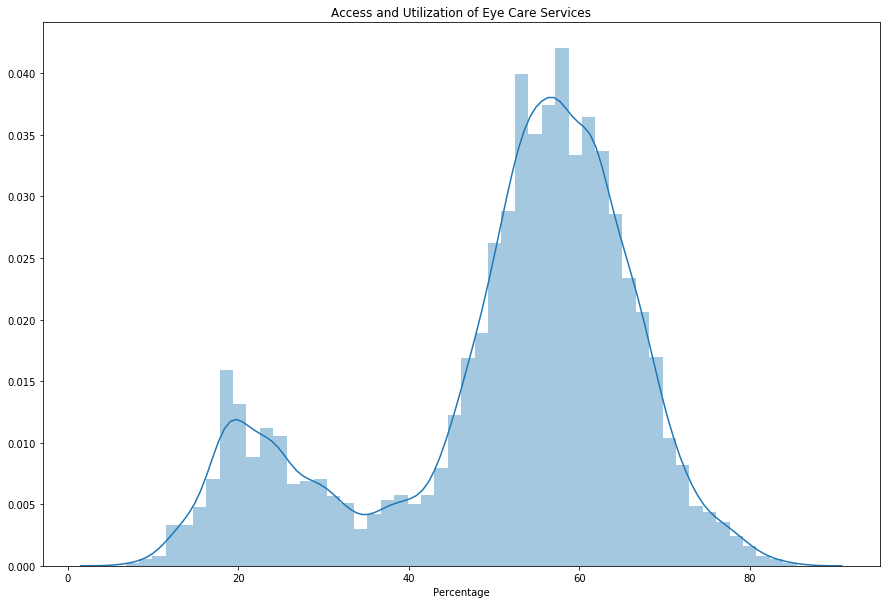

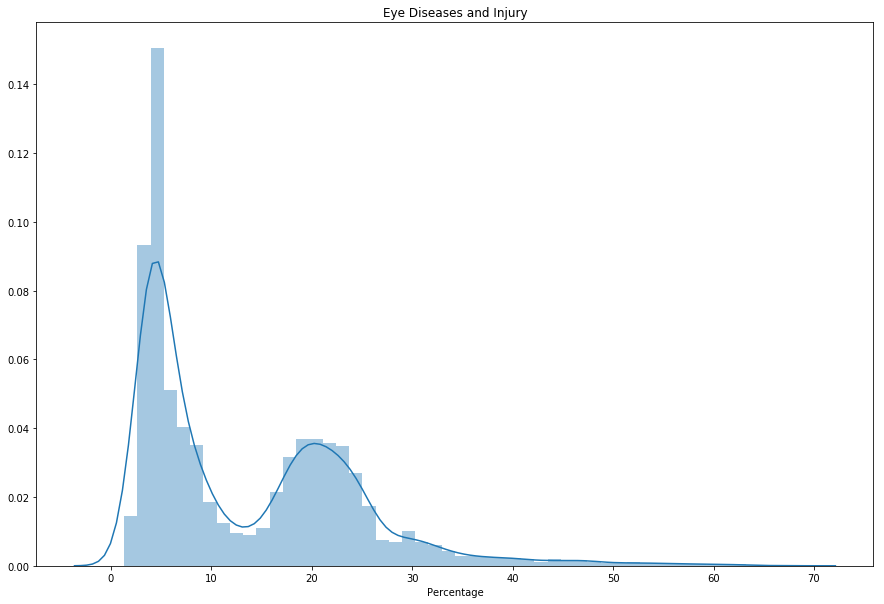

In [15]:
# Show the distribution of each dataframe

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(d1['Percentage']).set_title('Blindness or Severe Difficulty Seeing')

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(d2['Percentage']).set_title('Visual Impairment')

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(d3['Percentage']).set_title('Access and Utilization of Eye Care Services')

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(d4['Percentage']).set_title('Eye Diseases and Injury')

print("Distribution of Each Topic:\n")

In [16]:
# Training the model for d1 - Blindness or Severe Difficulty Seeing
X1 = d1[['Heart_Disease_Yes', 'Heart_Disease_No', 'Age_Group_18-39', 'Age_Group_40-64', 'Age_Group_65-', 'Physical_Activity_Yes', 'Physical_Activity_No', 'Race_Hispanic', 'Race_White', 'Race_Black', 'Race_Other', 'Current_Smoking', 'Former_Smoking', 'Never_Smoking', 'More_Than_High_School', 'High_School_And_Less', 'Stroke_Yes', 'Stroke_No', 'Male', 'Female', 'Diabetes_Yes', 'Diabetes_No', 'Poor_Health_Yes', 'Poor_Health_No', 'Hypertension_Yes', 'Hypertension_No']].values
y1 = d1['Percentage'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(d1.drop('Percentage',axis=1), d1['Percentage'], test_size=1/3, random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X1_train,y1_train)

y1_pred = regressor1.predict(X1_test)

y1_test = np.array(list(y1_test))
y1_pred = np.array(y1_pred)

df1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})

print("Results for Blindness or Severe Difficulty Seeing: \n")
print(df1.head(11))
#print(regressor1.intercept_)
#print(regressor1.coef_)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Results for Blindness or Severe Difficulty Seeing: 

    Actual  Predicted
0      5.1   7.708236
1      9.9   6.415283
2      9.0  10.371350
3      4.4   4.189135
4      2.2   1.355067
5      9.3   8.312687
6      2.9   4.070134
7      3.1   3.616266
8      7.9   8.312687
9      2.9   7.297204
10     7.6   4.070134

Mean Absolute Error: 1.8956051210508398
Mean Squared Error: 7.733239820928207
Root Mean Squared Error: 2.780870335151966


In [17]:
# Training the model for d2 - Visual Impairment
X2 = d2[['Heart_Disease_Yes', 'Heart_Disease_No', 'Age_Group_18-39', 'Age_Group_40-64', 'Age_Group_65-', 'Physical_Activity_Yes', 'Physical_Activity_No', 'Race_Hispanic', 'Race_White', 'Race_Black', 'Race_Other', 'Current_Smoking', 'Former_Smoking', 'Never_Smoking', 'More_Than_High_School', 'High_School_And_Less', 'Stroke_Yes', 'Stroke_No', 'Male', 'Female', 'Diabetes_Yes', 'Diabetes_No', 'Poor_Health_Yes', 'Poor_Health_No', 'Hypertension_Yes', 'Hypertension_No']].values
y2 = d2['Percentage'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(d2.drop('Percentage',axis=1), d2['Percentage'], test_size=1/3, random_state=0)

regressor2 = LinearRegression()
regressor2.fit(X2_train,y2_train)

y2_pred = regressor2.predict(X2_test)

y2_test = np.array(list(y2_test))
y2_pred = np.array(y2_pred)

df2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})

print("Results for Visual Impairment: \n")
print(df2.head(11))
#print(regressor2.intercept_)
#print(regressor2.coef_)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Results for Visual Impairment: 

    Actual  Predicted
0     44.1  30.674677
1     17.8  25.180246
2     38.9  25.945368
3     16.6  26.932922
4     41.5  33.229487
5     36.6  24.546835
6     24.2  24.600000
7     38.7  26.540268
8     23.7  30.674677
9     41.2  28.744619
10    26.9  23.837220

Mean Absolute Error: 9.71072712569485
Mean Squared Error: 113.01056655209126
Root Mean Squared Error: 10.630642809919411


In [18]:
# Training the model for d3 - Access and Utilization of Eye Care Services
X3 = d3[['Heart_Disease_Yes', 'Heart_Disease_No', 'Age_Group_18-39', 'Age_Group_40-64', 'Age_Group_65-', 'Physical_Activity_Yes', 'Physical_Activity_No', 'Race_Hispanic', 'Race_White', 'Race_Black', 'Race_Other', 'Current_Smoking', 'Former_Smoking', 'Never_Smoking', 'More_Than_High_School', 'High_School_And_Less', 'Stroke_Yes', 'Stroke_No', 'Male', 'Female', 'Diabetes_Yes', 'Diabetes_No', 'Poor_Health_Yes', 'Poor_Health_No', 'Hypertension_Yes', 'Hypertension_No']].values
y3 = d3['Percentage'].values
X3_train, X3_test, y3_train, y3_test = train_test_split(d3.drop('Percentage',axis=1), d3['Percentage'], test_size=1/3, random_state=0)

regressor3 = LinearRegression()
regressor3.fit(X3_train,y3_train)

y3_pred = regressor3.predict(X3_test)

y3_test = np.array(list(y3_test))
y3_pred = np.array(y3_pred)

df3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})

print("Results for Access and Utilization of Eye Care Services: \n")
print(df3.head(11))
#print(regressor3.intercept_)
#print(regressor3.coef_)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Results for Access and Utilization of Eye Care Services: 

    Actual  Predicted
0     33.1  51.115046
1     63.5  51.459402
2     55.0  49.958141
3     57.0  47.959562
4     60.3  50.061103
5     59.2  50.061103
6     67.6  56.279170
7     45.5  46.313990
8     68.8  51.459402
9     37.4  54.986718
10    64.3  52.752606

Mean Absolute Error: 12.100100387457777
Mean Squared Error: 245.16433782529774
Root Mean Squared Error: 15.657724541749282


In [19]:
# Training the model for d4 - Eye Diseases and Injury
X4 = d4[['Heart_Disease_Yes', 'Heart_Disease_No', 'Age_Group_18-39', 'Age_Group_40-64', 'Age_Group_65-', 'Physical_Activity_Yes', 'Physical_Activity_No', 'Race_Hispanic', 'Race_White', 'Race_Black', 'Race_Other', 'Current_Smoking', 'Former_Smoking', 'Never_Smoking', 'More_Than_High_School', 'High_School_And_Less', 'Stroke_Yes', 'Stroke_No', 'Male', 'Female', 'Diabetes_Yes', 'Diabetes_No', 'Poor_Health_Yes', 'Poor_Health_No', 'Hypertension_Yes', 'Hypertension_No']].values
y4 = d4['Percentage'].values
X4_train, X4_test, y4_train, y4_test = train_test_split(d4.drop('Percentage',axis=1), d4['Percentage'], test_size=1/3, random_state=0)

regressor4 = LinearRegression()
regressor4.fit(X4_train,y4_train)

y4_pred = regressor4.predict(X4_test)

y4_test = np.array(list(y4_test))
y4_pred = np.array(y4_pred)

df4 = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_pred.flatten()})

print("Results for Eye Diseases and Injury: \n")
print(df4.head(11))
#print(regressor4.intercept_)
#print(regressor4.coef_)
print('\nMean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

Results for Eye Diseases and Injury: 

    Actual  Predicted
0      4.9  13.343957
1     23.2  15.293977
2      4.0  12.152757
3     18.5  15.251846
4      4.7  12.782051
5      4.1  11.059732
6      4.8  15.251846
7     19.2  12.234443
8     10.0  14.843965
9     24.7  14.966194
10     4.2  11.843774

Mean Absolute Error: 8.813591410875626
Mean Squared Error: 100.64058818945168
Root Mean Squared Error: 10.031978278956334


Showing first 25 for d1 Prediction v.s. Acutal distribution


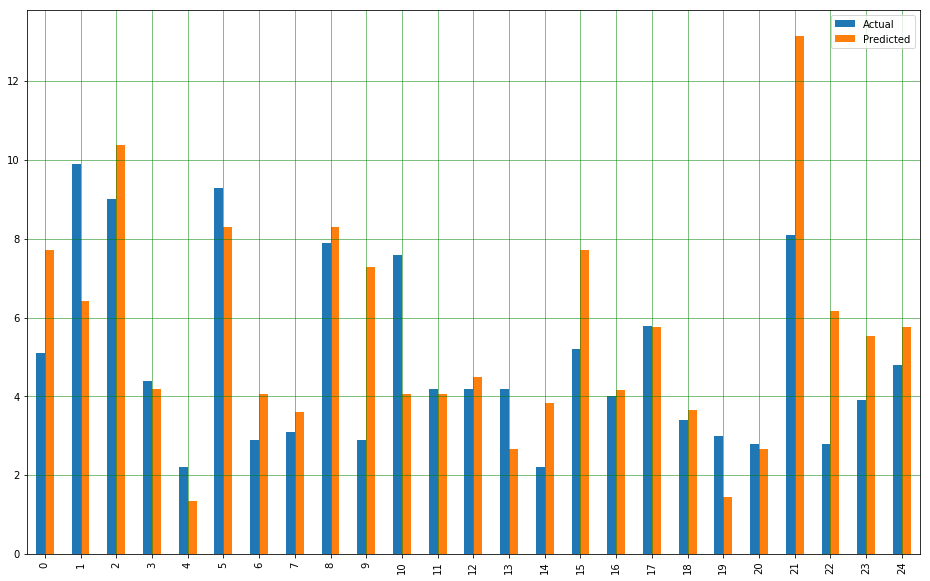

In [20]:
print("Showing first 25 for d1 Prediction v.s. Acutal distribution")
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

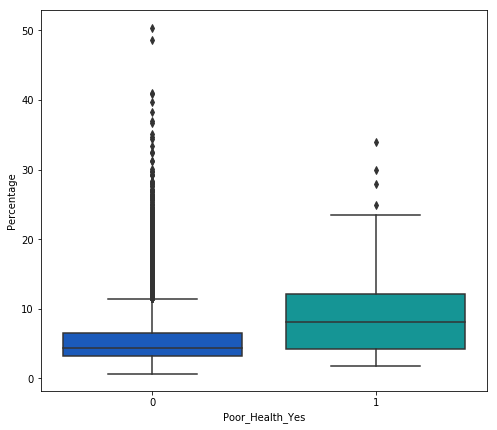

In [21]:
# Below is an example of showing the likelidhood of Blindness or Severe Difficulty Seeing when you have poor general health
plt.figure(figsize=(8, 7))
sns.boxplot(x= d1['Poor_Health_Yes'], y=d1['Percentage'],data=d1, palette='winter')

# Split and train the model using Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [31]:
# Preprocess for changing the continuous variable to discrete (1, 0)

def set_discrete(d):
    
    # First, find the mean of all percentage in data frame
    mean = d['Percentage'].mean()
    
    # Second, change the y value to 0 and 1 only according to the mean
    for i, j in d.iterrows(): 
        if j[0] < mean:
            d.at[i, 'Percentage'] = 0
        else:
            d.at[i, 'Percentage'] = 1


set_discrete(d1)
d1.head()

,Percentage,Heart_Disease_Yes,Heart_Disease_No,Age_Group_18-39,Age_Group_40-64,Age_Group_65-,Physical_Activity_Yes,Physical_Activity_No,Race_Hispanic,Race_White,...,Stroke_Yes,Stroke_No,Male,Female,Diabetes_Yes,Diabetes_No,Poor_Health_Yes,Poor_Health_No,Hypertension_Yes,Hypertension_No
0,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      3232
         1.0       0.81      0.61      0.70      1667

    accuracy                           0.82      4899
   macro avg       0.81      0.77      0.78      4899
weighted avg       0.82      0.82      0.81      4899



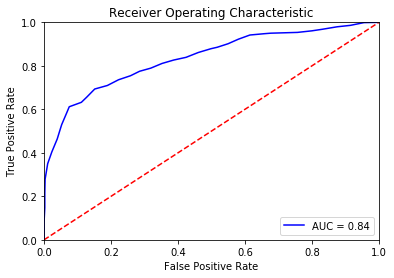

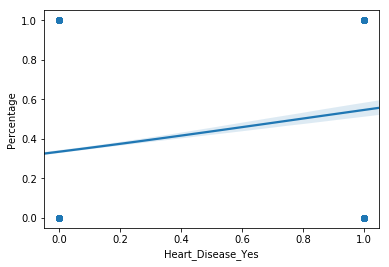

In [30]:
X_train, X_test, y_train, y_test = train_test_split(d1.drop('Percentage',axis=1), d1['Percentage'], test_size=1/3, random_state=100)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel1.predict(X_test)

print(classification_report(y_test,y_pred))
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

sns.regplot(x='Heart_Disease_Yes', y='Percentage', data=d1, logistic=True)